In [1]:
from analysis import *
import recommend_track
from pre_processing import read_pre_processed_data
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
from recommend_track import *
from IPython.display import Image
playlist_df, tracks_df, playlist_tracks_df = read_pre_processed_data('../data')

In [2]:
tracks_df['id'] = tracks_df['track_uri'].apply(lambda x: x.split(':')[-1])
tracks_df.head()

,artist_name,track_uri,artist_uri,track_name,album_uri,album_name,duration_s,track_id,id
0,Bob Dylan,spotify:track:6QHYEZlm9wyfXfEM1vSu1P,spotify:artist:74ASZWbe4lXaubB36ztrGX,Boots of Spanish Leather,spotify:album:7DZeLXvr9eTVpyI1OlqtcS,The Times They Are A-Changin',277,0,6QHYEZlm9wyfXfEM1vSu1P
1,Bob Dylan,spotify:track:3RkQ3UwOyPqpIiIvGVewuU,spotify:artist:74ASZWbe4lXaubB36ztrGX,Mr. Tambourine Man,spotify:album:1lPoRKSgZHQAYXxzBsOQ7v,Bringing It All Back Home,330,1,3RkQ3UwOyPqpIiIvGVewuU
2,Loggins & Messina,spotify:track:0ju1jP0cSPJ8tmojYBEI89,spotify:artist:7emRV8AluG3d4e5T0DZiK9,Danny's Song,spotify:album:5BWgJaesMjpJWCTU9sgUPf,The Best: Loggins & Messina Sittin' In Again,254,2,0ju1jP0cSPJ8tmojYBEI89
3,Bob Dylan,spotify:track:7ny2ATvjtKszCpLpfsGnVQ,spotify:artist:74ASZWbe4lXaubB36ztrGX,A Hard Rain's A-Gonna Fall,spotify:album:0o1uFxZ1VTviqvNaYkTJek,The Freewheelin' Bob Dylan,412,3,7ny2ATvjtKszCpLpfsGnVQ
4,Bob Dylan,spotify:track:18GiV1BaXzPVYpp9rmOg0E,spotify:artist:74ASZWbe4lXaubB36ztrGX,Blowin' In the Wind,spotify:album:0o1uFxZ1VTviqvNaYkTJek,The Freewheelin' Bob Dylan,165,4,18GiV1BaXzPVYpp9rmOg0E


# Top 10 Playlists based on number of Followers

/Users/apekshagaonkar/Documents/GitHub/ece143final/src/plots.py:46: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


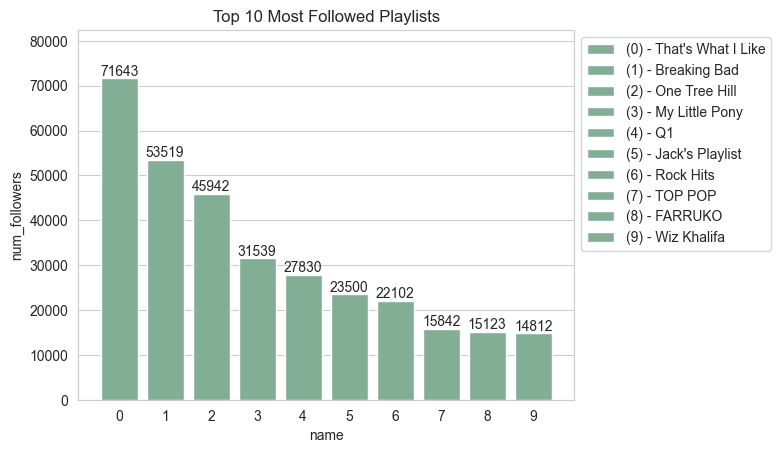

In [12]:
top_10_playlists = most_followed_playlist(playlist_df,N=10)
Image(filename=f"top10_playlist.png")


# Get the track info for the tracks in the top playlist

In [4]:
playlist_id = top_10_playlists.iloc[0]["pid"]
track_audio_features = playlist_track_features(tracks_df, playlist_tracks_df, playlist_id)
track_audio_features.head()

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
5lXcSvHRVjQJ3LB2rLKQog,Superstition - Single Version,0.650,0.658,100.541,-10.908,0.883,0.0850,0.004030,0.0526,0.0887
0sKlV58cODrjxGFOyf9IXY,The Way You Make Me Feel - 2012 Remaster,0.877,0.854,114.472,-4.523,0.540,0.1470,0.000055,0.1440,0.0544
0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,0.853,0.560,134.066,-4.961,0.860,0.0406,0.000000,0.0944,0.0130
6b8Be6ljOzmkOmFslEb23P,24K Magic,0.818,0.803,106.970,-4.282,0.632,0.0797,0.000000,0.1530,0.0340
5GorFaKkP2mLREQvhSblIg,All My Life,0.629,0.511,128.038,-8.651,0.181,0.0326,0.000004,0.0588,0.1140


# Get cosine similarity between current track and tracks in givent playlist

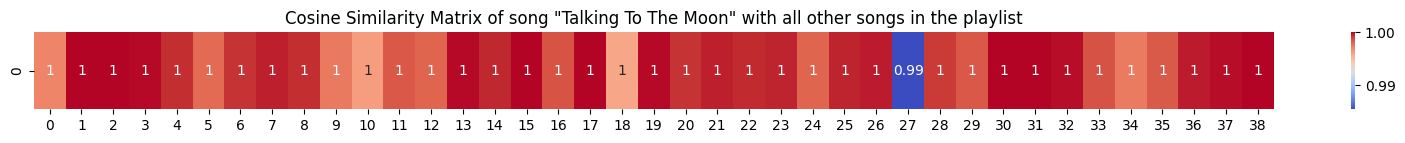

In [5]:
cos_sim = tracks_similarity_in_playlists(track_audio_features,'Talking To The Moon',plot=True)

# Which is the next similar track to play from the given playlist?

In [6]:
recommended_tracks = next_song_from_playlist(track_audio_features,'Talking To The Moon')
recommended_tracks

,track_name,similarity_ratio
0,Night by Night,0.999978
1,Bacon,0.999976
2,U Got It Bad,0.999969
3,That's What I Like,0.999962
4,The Way You Make Me Feel - 2012 Remaster,0.999946
5,P.Y.T. (Pretty Young Thing),0.999946
6,Billie Jean,0.999941
7,24K Magic,0.999936
8,California Love - Original Version,0.999931
9,Worship,0.999885


# Fetch the features for tracks in tracks_df

In [11]:
# tracks_feature_df = get_track_features_in_chunks(tracks_df,chunk_size=100,save=True)
tracks_feature_df = pd.read_csv('../data/tracks_features.csv',header=0)
tracks_feature_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.615,0.1140,-17.285,0.0357,0.926,0.000004,0.1660,0.401,101.189,6QHYEZlm9wyfXfEM1vSu1P,277107
1,0.390,0.3100,-14.545,0.0676,0.794,0.000000,0.3790,0.584,177.515,3RkQ3UwOyPqpIiIvGVewuU,330533
2,0.505,0.2580,-12.193,0.0297,0.805,0.000000,0.1200,0.641,141.003,0ju1jP0cSPJ8tmojYBEI89,254305
3,0.567,0.1980,-18.681,0.0327,0.919,0.000871,0.1350,0.321,92.467,7ny2ATvjtKszCpLpfsGnVQ,412200
4,0.380,0.0993,-20.567,0.0509,0.914,0.000023,0.0605,0.440,174.874,18GiV1BaXzPVYpp9rmOg0E,165427


# Clustering of tracks based on track features 

In [8]:
cluster_tracks_df = clustering_tracks(tracks_feature_df)
cluster_tracks_df.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.615,0.1140,-17.285,0.0357,0.926,0.000004,0.1660,0.401,101.189,6QHYEZlm9wyfXfEM1vSu1P,277107,4
1,0.390,0.3100,-14.545,0.0676,0.794,0.000000,0.3790,0.584,177.515,3RkQ3UwOyPqpIiIvGVewuU,330533,4
2,0.505,0.2580,-12.193,0.0297,0.805,0.000000,0.1200,0.641,141.003,0ju1jP0cSPJ8tmojYBEI89,254305,4
3,0.567,0.1980,-18.681,0.0327,0.919,0.000871,0.1350,0.321,92.467,7ny2ATvjtKszCpLpfsGnVQ,412200,4
4,0.380,0.0993,-20.567,0.0509,0.914,0.000023,0.0605,0.440,174.874,18GiV1BaXzPVYpp9rmOg0E,165427,4
5,0.579,0.4790,-10.348,0.0294,0.206,0.002110,0.1630,0.937,135.459,0wfBooQ6QtDm63UIyIcDIj,177200,6
6,0.383,0.2240,-16.990,0.0274,0.768,0.000000,0.0870,0.466,102.940,3xNO6JUk9ySYjxuqzcZYRB,288000,4
7,0.666,0.6170,-10.851,0.0628,0.565,0.000000,0.0498,0.764,105.648,5ka7NFOlZUpVLJmA2tO0o4,389800,6
8,0.702,0.5600,-12.323,0.0342,0.571,0.000000,0.1090,0.889,125.452,2FDTgrYDUdQKyGmtynEk90,171107,6
9,0.717,0.8040,-7.563,0.0342,0.664,0.000010,0.3490,0.488,121.017,2GbmNHjKB1HxSnyobburxg,165933,6


# Reccommend next song given current song

In [9]:
# Reccommend next song to the playlist from tracks_df
recommended_tracks = get_recommendation_from_cluster(cluster_tracks_df,tracks_df,"0ju1jP0cSPJ8tmojYBEI89")
recommended_tracks



10 track recommendations for track name:  Danny's Song


,track_name,id
2058,Be Still My Soul (In You I Rest),2dn2BVG8nFSB9HqXEl4F2V
4694,Typhoon,3cZN7WvYk8efaoXqxT70Qf
8823,Earned It,1UAQHOnuhuGpF2iBCMXnTu
11488,Manhattan,58JmE4tFkly8mzJRcV3Frk
21582,Vale La Pena El Placer,1F1ZBb99LyHuSiBP7OJtVW
23770,Autumn,7ffk6wvaNnnkKo5fvW7YBc
27812,People Help The People - RAK Studios Session,0C9GVLzBgL1vt47hJvsB9V
37804,Hopeless,0FV5UJ3aGray3oeNBpJ8oc
45267,Outside With You,4nJKBreh9oZHEibU7aR6oZ
56182,the words,0zxG0MKqXBEbwU09H7gEIs
